<img src='./img/egu21_logo.png' alt='Logo EU Copernicus EUMETSAT' align='left' width='25%'></img><img src='./img/atmos_logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='65%'></img></span>

<br>

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./05_Metop-ABC_GOME-2_AAI_L3_load_browse.ipynb"><< 05 - Metop-ABC GOME-2 AAI Level 3</a><span style="float:right;"><a href="./13_CAMS_European_air_quality_forecast_dust_concentration_exercise_solution.ipynb">13 - CAMS European air quality forecast - Dust - Exercise Solution >></a></span>

<div class="alert alert-block alert-info">
<b>EXERCISE WORKBOOK</b>
</div>

<hr>

# CAMS - Global Near-Real-Time Forecast - Dust Aerosol Optical Depth

This notebook is an `exercise workbook` which allows you to practise the preparation of CAMS global near-real-time forecast data, using the variable `Dust Aerosol Optical Depth` to analyse a dust event at the beginning of February 2021.

### How it works

This exercise workbook consists of two types of exercises:

#### Coding assignments
Coding assignments ask you to fill an empty code cell with code.
You recognize `coding assignments` as the yellow-coloured boxes.

<div class="alert alert-block alert-warning">
<b>Coding assignment</b>
</div>

#### Questions

Questions ask you to reflect on a result and output. `Questions` are provided as green-coloured boxes.

<div class="alert alert-block alert-success">
<b>Question</b>
</div>

#### Outline:
* [1 - Load and browse dust aerosol optical depth (duaod) at 550nm of the CAMS global near-real-time forecast](#load_browse)
* [2 - Retrieve the data variable dust AOD at 550nm as xarray.DataArray](#data_retrieve)
* [3 - Visualize dust AOD at 550nm](#visualize)
* [4 - Create a geographical subset for Europe](#subset)

<hr>

##### Load required libraries

In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd

from IPython.display import HTML

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
from datetime import datetime

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

##### Load helper functions

In [2]:
%run ./functions.ipynb

<hr>

### <a id='load_browse'></a>Load and browse `CAMS global near-real-time forecast` data

CAMS global near-real-time forecast data is available either in `GRIB` or `netCDF`. The data for the present example has been downloaded as `netCDF`. See an example how to download the data with the `ECMWF WebAPI` [here](./01_overview_atmospheric_composition_data_retrieve.ipynb#ecmwf_archive).

You can use xarray's function `xr.open_dataset()` to open the netCDF file as `xarray.Dataset`.

In [3]:
file = xr.open_dataset('./eodata/cams/near_real_time/2021/02/05/20210205-10_dustAOD.nc')
file



<xarray.Dataset>
Dimensions:    (latitude: 451, longitude: 900, time: 11)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 178.8 179.2 179.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2021-02-05 ... 2021-02-10
Data variables:
    duaod550   (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-04-23 10:00:25 GMT by grib_to_netcdf-2.21.0: grib_to_n...

<div class="alert alert-block alert-success">
<b>Question:</b><br>

Inspect the loaded `xarray.Dataset`:
- How many dimensions does the data array have?
- What data variables does the xarray.Dataset offer?
</div>

**Response**

The data above has three dimensions (`latitude`, `longitude`, `time`) and one data variable:
* `duaod550`: Dust Aerosol Optical Depth at 550nm

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the coordinate <b>time</b> from the xarray.Dataset <i>file</i>.
</div>

In [26]:
# Enter your solution here








In [4]:
file.time

<xarray.DataArray 'time' (time: 11)>
array(['2021-02-05T00:00:00.000000000', '2021-02-05T12:00:00.000000000',
       '2021-02-06T00:00:00.000000000', '2021-02-06T12:00:00.000000000',
       '2021-02-07T00:00:00.000000000', '2021-02-07T12:00:00.000000000',
       '2021-02-08T00:00:00.000000000', '2021-02-08T12:00:00.000000000',
       '2021-02-09T00:00:00.000000000', '2021-02-09T12:00:00.000000000',
       '2021-02-10T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-02-05 2021-02-05T12:00:00 ... 2021-02-10
Attributes:
    long_name:  time

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>
    
How many hours does each timestep have in the loaded `xarray.DataArray`?
</div>

**Response**

Each timestep has `12` hours.

### <a id='shift'></a>Bring longitude coordinates onto a [-180,180] grid

You can assign new values to coordinates in an `xarray.Dataset`. You can do so with the `assign_coords()` function, which you can apply onto a `xarray.Dataset`. With the code below, you shift your longitude grid from [0,360] to [-180,180]. At the end, you sort the longitude values in an ascending order.

In [6]:
file_assigned = file.assign_coords(longitude=(((file.longitude + 180) % 360) - 180)).sortby('longitude')
file_assigned

<xarray.Dataset>
Dimensions:    (latitude: 451, longitude: 900, time: 11)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 179.20001 179.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2021-02-05 ... 2021-02-10
Data variables:
    duaod550   (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-04-23 10:00:25 GMT by grib_to_netcdf-2.21.0: grib_to_n...

<br>

A quick check of the longitude coordinates of the new `xarray.Dataset` shows you that the longitude values range now between [-180, 180].

In [7]:
file_assigned.longitude

<xarray.DataArray 'longitude' (longitude: 900)>
array([-180.     , -179.6    , -179.2    , ...,  178.79999,  179.20001,
        179.6    ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 179.20001 179.6

### <a id='data_retrieve'></a>Retrieve the variable `Dust Aerosol Optical Depth at 550nm` as xarray.DataArray

Let us store the data variable `Dust Aerosol Optical Depth (AOD) at 550nm` as `xarray.DataArray` with the name `du_aod`.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the data variable <b>duaod550</b> from the xarray.Dataset <i>file_assigned</i> and call it <b>du_aod</b> 
</div>

In [30]:
# Enter your solution here








In [8]:
du_aod = file_assigned.duaod550
du_aod

<xarray.DataArray 'duaod550' (time: 11, latitude: 451, longitude: 900)>
[4464900 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 179.20001 179.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2021-02-05 ... 2021-02-10
Attributes:
    units:      ~
    long_name:  Dust Aerosol Optical Depth at 550nm

Above, you see that the variable `du_aod` has two attributes, `units` and `long_name`. Let us define variables for those attributes. The variables can be used for visualizing the data.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the attribute <b>long_name</b> from the xarray.Dataset <i>du_aod</i> and call it <b>long_name</b>. Then, select the attribute <b>units</b> from the xarray.Dataset <i>du_aod</i> and call it <b>units</b>.
</div>

In [32]:
# Enter your solution here








In [9]:
long_name = du_aod.long_name
units = du_aod.units

Let us do the same for the coordinates `longitude` and `latitude`.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the attribute <b>latitude</b> from the xarray.Dataset <i>du_aod</i> and call it <b>latitude</b>. Then, select the attribute <b>longitude</b> from the xarray.Dataset <i>du_aod</i> and call it <b>longitude</b>.
</div>

In [34]:
# Enter your solution here








In [10]:
latitude = du_aod.latitude
longitude = du_aod.longitude

<br>

### <a id='visualize'></a>Visualize `Dust Aerosol Optical Depth at 550nm`

The next step is to visualize the Dust Aerosol Optical Depth data for one time step.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Make use of the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) in order to visualize the xarray.DataArray <code>du_aod</code>. <br>
    
The following kwargs have to be defined:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color_scale`
* `unit`
* `longname`
* `vmin`,
* `vmax`,
* `lonmin`, `lonmax`, `latmin`, `latmax`
* `set_global`
    
**HINT**: 
* With `?visualize_pcolormesh` you can open the function's docstring to see what keyword arguments are needed to prepare your plot
* You can use `YlGn` as color map, `ccrs.PlateCarree()` as projection
* Try to add the time information as part of the title. Add the string of the datetime information to the `longname` variable: `long_name + ' on ' +str(du_aod.time[0].dt.strftime('%Y-%m-%d').data)`.
* Try using `0` for the vmin and `1.5` for the vmax. 

</div>

In [36]:
# Enter your solution here








(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Dust Aerosol Optical Depth at 550nm on 2021-02-05'}>)

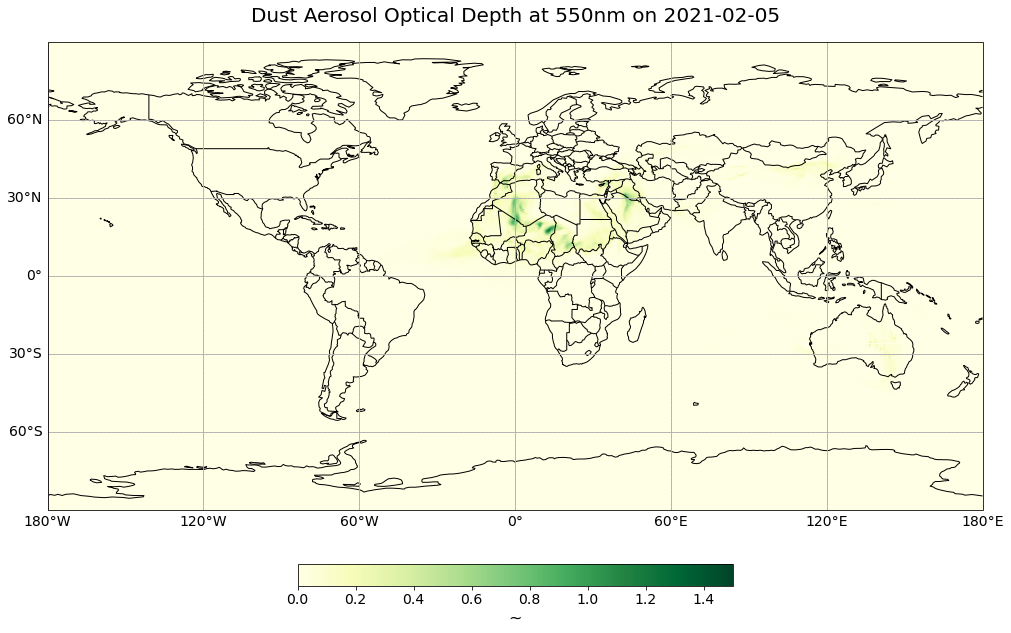

In [11]:
visualize_pcolormesh(data_array=du_aod[0,:,:],
                     longitude=longitude,
                     latitude=latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='YlGn',
                     unit=units,
                     long_name=long_name + ' on ' +str(du_aod.time[0].dt.strftime('%Y-%m-%d').data),
                     vmin=0, 
                     vmax=1.5,
                     lonmin=-180,
                     lonmax=180,
                     latmin=-90,
                     latmax=90,
                     set_global=True)


<br>

### <a id='subset'></a>Create a geographical subset for Europe

The map above shows organic matter of Dust Aerosol Optical Depth at 550nm globally. Let us create a geographical subset for Europe, in order to better analyse the Saharan dust event over Europe.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Create a geographical subset for Europe. Make use of the function <a href='../functions.ipynb#generate_geographical_subset'>generate_geographical_subset</a> and call the new DataArray <code>du_aod_subset</code>.<br>

The bounding box information can be the following:<br>
- **latmin=28.**
- **latmax=71.**
- **lonmin=-22.**
- **lonmax=43**

<b>HINT:</b><br> With `?generate_geographical_subset`, you can see what keyword arguments the function requires.

</div>

In [38]:
# Enter your solution here








In [12]:
du_aod_subset = generate_geographical_subset(xarray=du_aod, 
                                             latmin=28, 
                                             latmax=71, 
                                             lonmin=-22, 
                                             lonmax=43)
du_aod_subset

<xarray.DataArray 'duaod550' (time: 11, latitude: 107, longitude: 162)>
array([[[4.31597233e-04, 4.31597233e-04, 4.05848026e-04, ...,
         7.66873360e-04, 7.92622566e-04, 7.92622566e-04],
        [4.31597233e-04, 4.05848026e-04, 3.80039215e-04, ...,
         8.95798206e-04, 8.95798206e-04, 9.21547413e-04],
        [4.05848026e-04, 3.80039215e-04, 3.80039215e-04, ...,
         9.73165035e-04, 9.73165035e-04, 9.73165035e-04],
        ...,
        [2.76923180e-04, 2.76923180e-04, 3.02672386e-04, ...,
         2.45302200e-01, 2.96798289e-01, 5.02344131e-01],
        [2.25305557e-04, 2.51114368e-04, 2.51114368e-04, ...,
         2.38417149e-01, 2.64332771e-01, 4.26195949e-01],
        [1.99556351e-04, 1.99556351e-04, 1.99556351e-04, ...,
         2.38700807e-01, 2.54172802e-01, 3.86716515e-01]],

       [[4.83214855e-04, 4.83214855e-04, 4.57406044e-04, ...,
         6.89506531e-04, 7.15255737e-04, 7.15255737e-04],
        [4.83214855e-04, 4.83214855e-04, 4.83214855e-04, ...,
         6.89506531e-04, 7.15255737e-04, 7.41064548e-04],
        [5.08964062e-04, 5.08964062e-04, 5.08964062e-04, ...,
         7.15255737e-04, 7.15255737e-04, 7.41064548e-04],
...
        [5.86330891e-04, 4.83214855e-04, 4.05848026e-04, ...,
         2.58057117e-02, 2.64762044e-02, 2.61151791e-02],
        [7.41064548e-04, 6.63697720e-04, 5.60522079e-04, ...,
         2.29176283e-02, 2.19892859e-02, 2.14993358e-02],
        [9.21547413e-04, 8.18431377e-04, 7.15255737e-04, ...,
         2.48258710e-02, 2.34333873e-02, 2.24018693e-02]],

       [[5.08964062e-04, 5.08964062e-04, 4.83214855e-04, ...,
         5.34772873e-04, 5.60522079e-04, 5.86330891e-04],
        [4.83214855e-04, 4.83214855e-04, 4.83214855e-04, ...,
         5.60522079e-04, 5.86330891e-04, 6.12139702e-04],
        [5.08964062e-04, 5.08964062e-04, 5.08964062e-04, ...,
         5.86330891e-04, 6.12139702e-04, 6.37888908e-04],
        ...,
        [3.28481197e-04, 3.02672386e-04, 3.02672386e-04, ...,
         2.13446617e-02, 2.20150948e-02, 2.24018693e-02],
        [4.57406044e-04, 4.31597233e-04, 3.80039215e-04, ...,
         1.85338855e-02, 1.79665685e-02, 1.79665685e-02],
        [5.86330891e-04, 5.34772873e-04, 4.57406044e-04, ...,
         1.76055431e-02, 1.61873102e-02, 1.52589679e-02]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -21.600006 -21.199997 ... 42.399994 42.800003
  * latitude   (latitude) float32 70.8 70.4 70.0 69.6 ... 29.6 29.2 28.8 28.4
  * time       (time) datetime64[ns] 2021-02-05 ... 2021-02-10
Attributes:
    units:      ~
    long_name:  Dust Aerosol Optical Depth at 550nm

<div class="alert alert-block alert-success">
<b>Question:</b><br>

What is the largest `latitude` coordinate value for DataArray **du_aod_subset** compared to that of DataArray **du_aod**?
</div>

**Response**

The largest latitude value is now `70.8` compared to `90` from the unsubsetted dataset.

<br>

Let us now visualize the subsetted `xarray.DataArray` over Europe.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Make use of the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) in order to visualize the subsetted DataArray <code>du_aod_subset</code>. <br>
    
Make sure to set the `set_global` kwarg to `False` and specify the latitude and longitude bounding box to the ones specified for Europe.

Try also to add the time information as part of the title. Add the string of the datetime information to the `longname` variable: `long_name + ' on ' +str(du_aod_subset.time[0].dt.strftime('%Y-%m-%d').data)`.

In [40]:
# Enter your solution here








(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Dust Aerosol Optical Depth at 550nm on 2021-02-05'}>)

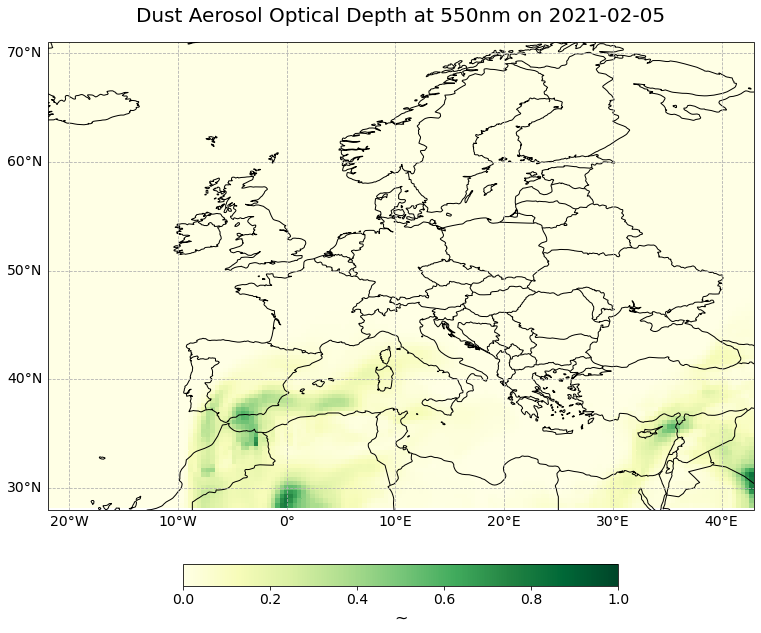

In [13]:
visualize_pcolormesh(data_array=du_aod_subset[0,:,:],
                     longitude=du_aod_subset.longitude,
                     latitude=du_aod_subset.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='YlGn',
                     unit=units,
                     long_name=long_name + ' on ' +str(du_aod_subset.time[0].dt.strftime('%Y-%m-%d').data),
                     vmin=0, 
                     vmax=1,
                     latmin=28, 
                     latmax=71, 
                     lonmin=-22, 
                     lonmax=43,
                     set_global=False)

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./05_Metop-ABC_GOME-2_AAI_L3_load_browse.ipynb"><< 05 - Metop-ABC GOME-2 AAI Level 3</a><span style="float:right;"><a href="./13_CAMS_European_air_quality_forecast_dust_concentration_exercise_solution.ipynb">13 - CAMS European air quality forecast - Dust - Exercise Solution >></a></span>

<hr>

<img src='../../img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br><br>
<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.